# Lab Three: Extending Logistic Regression

#### Garrett Webb, Jackson Heck, and Maria Harrison

### NOTE: As this code was run multiple times, the outputs are slightly varied due to new fits.

## 1. Preparation and Overview

### 1.1 Explaining Task

The dataset we are using is a subset of the data collected during the 1987 National Indonesia Contraceptive Prevalence Survey. The dataset contains 1473 samples and 9 features, including numerical and categorical data. 

Each sample correlates to a woman and her answers to the survey. The different features highlight factors like age, education level, religious views, occupation, level of media exposure, and standard of living. The target is the type of contraceptive method used. The three values for this are "no use," "long-term use," and "short-term use." We will be using logistic regression to predict the type of contraceptive method used based on the given values of the 9 features. To do this, we will first split our data into training and testing data. 

The use of contraceptives can correlate to the rate of population growth. Thus, governining bodies might be interested in our model and results to help guide their policy decisions. The results from our model might help government officials understand what factors play a key role in determining the use of contraceptives. 

Since this model would most likely be used by governments or institutions related to health care, the model might be used mostly for offline analysis. This would be most likely determined by the privacy laws and health information privacy laws of the area using the model. 

Since governments and health care institutions do not like to make errors, our prediction model should be at least 90% accurate in order to be useful to the third parties interested in our model. This level of accuracy would allow our third parties to confidently use our model in making policy decisions.

============================================================================================================================================================================


Dataset: Contraceptive Method Choice Data Set URL: https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice

### 1.2 Define and Prepare Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

accuracies = []
times = []

df = pd.read_csv('./data/cmc.data')

df.head()

,wife_age,wife_education_level,husband_education_level,num_children,isMuslim,isNotWorking,husband_occupation,standard_of_living,isNotExposedToMedia,contraceptive_method_used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [2]:
# find data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   wife_age                   1473 non-null   int64
 1   wife_education_level       1473 non-null   int64
 2   husband_education_level    1473 non-null   int64
 3   num_children               1473 non-null   int64
 4   isMuslim                   1473 non-null   int64
 5   isNotWorking               1473 non-null   int64
 6   husband_occupation         1473 non-null   int64
 7   standard_of_living         1473 non-null   int64
 8   isNotExposedToMedia        1473 non-null   int64
 9   contraceptive_method_used  1473 non-null   int64
dtypes: int64(10)
memory usage: 115.2 KB
None


In practice, we will change the categorical features type to object. However, this is not necessarily necessary since we will eventually normalize the data changing all the feature types to floats.

In [3]:
categ_features = ['isMuslim','isNotWorking','isNotExposedToMedia'];
df[categ_features] = df[categ_features].astype(np.object_)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   wife_age                   1473 non-null   int64 
 1   wife_education_level       1473 non-null   int64 
 2   husband_education_level    1473 non-null   int64 
 3   num_children               1473 non-null   int64 
 4   isMuslim                   1473 non-null   object
 5   isNotWorking               1473 non-null   object
 6   husband_occupation         1473 non-null   int64 
 7   standard_of_living         1473 non-null   int64 
 8   isNotExposedToMedia        1473 non-null   object
 9   contraceptive_method_used  1473 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 115.2+ KB


In [5]:
for col in df:
    print(col)
    print(df[col].unique())

wife_age
[24 45 43 42 36 19 38 21 27 44 26 48 39 37 46 40 29 31 33 25 28 47 32 49
 34 20 22 30 23 35 41 17 18 16]
wife_education_level
[2 1 3 4]
husband_education_level
[3 2 4 1]
num_children
[ 3 10  7  9  8  0  6  1  2  4  5 12 11 13 16]
isMuslim
[1 0]
isNotWorking
[1 0]
husband_occupation
[2 3 1 4]
standard_of_living
[3 4 2 1]
isNotExposedToMedia
[0 1]
contraceptive_method_used
[1 2 3]


For education level, 1 refers to a low level of education while a 4 refers to a high level of education.

For the occupation of the husband, a 1 refers to a job in the "professional, technical, or clerical" field, a 2 refers to a job in the "sales or service" field, a 3 refers to a job in the "manual" field, and a 4 refers to a job in the "agricultural" field.

For the target, the contraceptive method used, a 1 refers to "no use," a 2 refers to "long-term use," and a 3 refers to "short-term use."

From the above outputs, we can see that there are no missing or strange values in our dataset.

In [6]:
# find the number of duplicates
len(df[df.duplicated()])

48

This shows that 48 samples are duplicates. Since there over 1,000 samples and only 10 attributes, it is likely that some women will have the same answers to the survey resulting in the duplicate data. Unfortunately, it is difficult to determine if they are true duplicates since the dataset does not include any uniquely identifying information about each individual such as name, date of birth, or single identity number from an Indonesian identiy card.

Since there are no missing values and not enough information to verify the duplicates, there is no need to impute any missing information or drop any instances or features. Additionally, we believe all features might be useful to predict the target and give us information on what factors in to choosing a contraceptive method. If we could verify that the duplicates were the answers of the same woman, then we would drop the duplicates in order to ensure that there is only one instance of each woman who answered the survey. If there were missing values, then we could use different methods of imputation depending on what type of data was missing.

In [7]:
df_target = df['contraceptive_method_used'].value_counts()
print(df_target)

1    629
3    511
2    333
Name: contraceptive_method_used, dtype: int64


In [8]:
print("Percentage of targets valued 1: " + str(df_target[1]/len(df.index)*100))
print("Percentage of targets valued 2: " + str(df_target[2]/len(df.index)*100))
print("Percentage of targets valued 3: " + str(df_target[3]/len(df.index)*100))

Percentage of targets valued 1: 42.701968771215206
Percentage of targets valued 2: 22.606924643584524
Percentage of targets valued 3: 34.691106585200274


We will need to normalize the age data, but this will be done after dividing the data into the training and testing sets.

### 1.3 Divide Data

In [9]:
X = df[['wife_age', 'wife_education_level', 'husband_education_level', 'num_children', 'isMuslim', 'isNotWorking', 'husband_occupation', 'standard_of_living', 'isNotExposedToMedia']].copy()
y = df['contraceptive_method_used'].to_numpy() 

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   wife_age                 1473 non-null   int64 
 1   wife_education_level     1473 non-null   int64 
 2   husband_education_level  1473 non-null   int64 
 3   num_children             1473 non-null   int64 
 4   isMuslim                 1473 non-null   object
 5   isNotWorking             1473 non-null   object
 6   husband_occupation       1473 non-null   int64 
 7   standard_of_living       1473 non-null   int64 
 8   isNotExposedToMedia      1473 non-null   object
dtypes: int64(6), object(3)
memory usage: 103.7+ KB


In [11]:
y.shape

(1473,)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1178, 9) (1178,)
(295, 9) (295,)


In [13]:
X_train

,wife_age,wife_education_level,husband_education_level,num_children,isMuslim,isNotWorking,husband_occupation,standard_of_living,isNotExposedToMedia
1390,35,1,2,5,1,1,3,3,0
29,43,1,2,8,1,1,2,4,0
270,30,4,4,2,1,1,1,4,0
934,46,4,4,4,0,1,1,4,0
1179,23,3,2,0,1,1,2,2,0
...,...,...,...,...,...,...,...,...,...
763,22,3,4,3,1,1,2,3,0
835,37,2,4,3,1,1,2,3,0
1216,31,4,4,4,1,1,3,3,0
559,29,4,3,4,1,0,3,2,0


In [14]:
y_train

array([3, 1, 1, ..., 2, 2, 3])

In [15]:
elements_count = {}
for element in y_train:
   if element in elements_count:
      elements_count[element] += 1
   else:
      elements_count[element] = 1
for key, value in elements_count.items():
    percentage = value/len(y_train)*100
    print(f"{key} percentage: {percentage}")

3 percentage: 36.33276740237691
1 percentage: 41.76570458404075
2 percentage: 21.901528013582343


In [16]:
elements_count = {}
for element in y_test:
   if element in elements_count:
      elements_count[element] += 1
   else:
      elements_count[element] = 1
for key, value in elements_count.items():
    percentage = value/len(y_test)*100
    print(f"{key} percentage: {percentage}")

1 percentage: 46.440677966101696
2 percentage: 25.423728813559322
3 percentage: 28.135593220338983


These were the percentage of the frequency of each target value in the original dataset:

Percentage of targets valued 1: 42.701968771215206%

Percentage of targets valued 2: 22.606924643584524%

Percentage of targets valued 3: 34.691106585200274%.

The percentages of those same values roughly match the percentage of the values in the training and testing target set.

An 80/20 split is appropriate because, while the accuracy appears low, we have determined this to be a result of the features and target being less correlated than expected, and not (or minimally) due to the training set being too small. We did run some of the algorithms that will be seen below with different training and testing splits. However, there was not much improvement. 

We want to split the dataset so that both the training and testing datsets are good representations of the problem. However, this also means the original dataset needs to represent the problem domain well. Thus, we want data that has ennough combinations of input data to fully understand all possibilities. 

Honestly, splitting the dataset and implementing our own algorithms might perform better if we had much more data to train. Thus, it would be nice to test this on the entirety of the orginal dataset that our dataset came from. 

While we think there might not be a high correlation between the features and the target values, our implementation might not perform as well since our model might not have enough data in the training set to properly learn.

## 2. Modeling

### 2.1 Custom One-Vs-All Logistic Regression Classifier Implementation

Most of the source code below was taken from Dr. Larson's notebooks with our own additions.

#### 2.1.1 BinaryLogisticRegressionBase Class

In [17]:
class BinaryLogisticRegressionBase:
    # private: 
    def __init__(self, eta, optimization_technique, iterations=20, regularization=None, C1=0.001, C2=0.001):
        self.eta = eta
        self.optimization_technique = optimization_technique
        self.iters = iterations
        self.regularization = regularization
        self.C1 = C1
        self.C2 = C2
    
    def __str__(self):
        return 'Base Binary Logistic Regression Object, Not Trainable'
    
    # convenience, private and static:
    @staticmethod
    def _sigmoid(theta):
        return 1/(1+np.exp(-theta)) 
    
    @staticmethod
    def _add_bias(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term
    
    # public:
    def predict_proba(self, X, add_bias=True):
        # add bias term if requested
        Xb = self._add_bias(X) if add_bias else X
        return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction


#### 2.1.2 BinaryLogisticRegression Class

In [18]:
# inherit from base class
class BinaryLogisticRegression(BinaryLogisticRegressionBase):
    #private:
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained Binary Logistic Regression Object'
        
    def _get_gradient(self,X,y):
        # programming \sum_i (yi-g(xi))xi
        gradient = np.zeros(self.w_.shape) # set gradient to zero
        for (xi,yi) in zip(X,y):
            # the actual update inside of sum
            gradi = (yi - self.predict_proba(xi,add_bias=False))*xi 
            # reshape to be column vector and add to gradient
            gradient += gradi.reshape(self.w_.shape) 
        
        return gradient/float(len(y))
       
    # public:
    def fit(self, X, y):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros
        
        # for as many as the max iterations
        for _ in range(self.iters):
            gradient = self._get_gradient(Xb,y)
            self.w_ += gradient*self.eta # multiply by learning rate 

#### 2.1.3 VectorBinaryLogisticRegression Class

In [19]:
from scipy.special import expit
from numpy.linalg import pinv

class VectorBinaryLogisticRegression(BinaryLogisticRegression):
    # inherit from our previous class to get same functionality
        
    @staticmethod
    def _sigmoid(theta):
        # increase stability, redefine sigmoid operation
        return expit(theta) #1/(1+np.exp(-theta))
    
    # but overwrite the gradient calculation
    def _get_gradient(self,X,y):
        if self.optimization_technique == "steepest ascent":
            ydiff = y-self.predict_proba(X,add_bias=False).ravel() # get y difference
            gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
            
            gradient = gradient.reshape(self.w_.shape)
            
            if self.regularization == "L1":
                gradient[1:] += -self.C1 * self.w_[1:]
            elif self.regularization == "L2":
                gradient[1:] += -2 * self.w_[1:] * self.C2
            elif self.regularization == "both":
                gradient[1:] += -self.C1 * self.w_[1:]
                gradient[1:] += -2 * self.w_[1:] * self.C2
            return gradient
        elif self.optimization_technique == "stochastic gradient ascent":
            ## implement this technique
            idx = int(np.random.rand()*len(y)) # grab random instance
            ydiff = y[idx]-self.predict_proba(X[idx],add_bias=False) # get y difference (now scalar)
            gradient = X[idx] * ydiff[:,np.newaxis] # make ydiff a column vector and multiply through

            gradient = gradient.reshape(self.w_.shape)
            
            if self.regularization == "L1":
                gradient[1:] += -self.C1 * self.w_[1:]
            elif self.regularization == "L2":
                gradient[1:] += -2 * self.w_[1:] * self.C2
            elif self.regularization == "both":
                gradient[1:] += -self.C1 * self.w_[1:]
                gradient[1:] += -2 * self.w_[1:] * self.C2

            return gradient
        elif self.optimization_technique == "Newton's method":
            g = self.predict_proba(X,add_bias=False).ravel() # get sigmoid value for all classes
            hessian = X.T @ np.diag(g*(1-g)) @ X - 2 * self.C1 # calculate the hessian

            ydiff = y-g # get y difference
            gradient = np.sum(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
            
            gradient = gradient.reshape(self.w_.shape)
            
            if self.regularization == "L1":
                gradient[1:] += -self.C1 * self.w_[1:]
            elif self.regularization == "L2":
                gradient[1:] += -2 * self.w_[1:] * self.C2
            elif self.regularization == "both":
                gradient[1:] += -self.C1 * self.w_[1:]
                gradient[1:] += -2 * self.w_[1:] * self.C2
        
            return pinv(hessian) @ gradient

#### 2.1.4 LogisticRegression Class

In [20]:
class LogisticRegression:
    def __init__(self, eta, optimization_technique, iterations=20, regularization=None, C1=0.001, C2=0.001):
        self.eta = eta
        self.optimization_technique = optimization_technique
        self.iters = iterations
        # internally we will store the weights as self.w_ to keep with sklearn conventions
        self.regularization = regularization
        self.C1 = C1
        self.C2 = C2
            
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'
      
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = (y==yval) # create a binary problem
            # train the binary classifier for this class
            blr = VectorBinaryLogisticRegression(eta=self.eta, optimization_technique=self.optimization_technique, iterations=self.iters, regularization=self.regularization, C1=self.C1, C2=self.C2)
            blr.fit(X,y_binary)
            # add the trained classifier to the list
            self.classifiers_.append(blr)
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T
        
    def predict_proba(self,X):
        probs = []
        for blr in self.classifiers_:
            probs.append(blr.predict_proba(X)) # get probability for each classifier
        
        return np.hstack(probs) # make into single matrix
    
    def predict(self,X):
        return self.unique_[np.argmax(self.predict_proba(X),axis=1)] # take argmax along row

### 2.2 Train Custom Classifier

#### 2.2.1 Normalize Data

In [21]:
## normalize training set
from sklearn.preprocessing import StandardScaler

X_train_scaled = StandardScaler().fit(X_train).transform(X_train)

In [22]:
X_train_scaled

array([[ 0.33249213, -1.92679928, -1.75205672, ...,  0.98946061,
        -0.12632575, -0.27531634],
       [ 1.31814985, -1.92679928, -1.75205672, ..., -0.1657273 ,
         0.89293271, -0.27531634],
       [-0.28354394,  1.02478662,  0.70207267, ..., -1.3209152 ,
         0.89293271, -0.27531634],
       ...,
       [-0.16033672,  1.02478662,  0.70207267, ...,  0.98946061,
        -0.12632575, -0.27531634],
       [-0.40675115,  1.02478662, -0.52499202, ...,  0.98946061,
        -1.14558421, -0.27531634],
       [ 0.94852821,  1.02478662,  0.70207267, ..., -1.3209152 ,
         0.89293271, -0.27531634]])

In [23]:
## normalize testing set
X_test_scaled = StandardScaler().fit(X_test).transform(X_test)

In [24]:
X_test_scaled

array([[-0.75602692,  0.04037042,  0.68583331, ...,  1.0290115 ,
        -0.18131908, -0.31089271],
       [ 0.29324201,  0.04037042, -0.53296685, ..., -0.13404748,
        -0.18131908,  3.21654377],
       [ 0.64299833,  1.0328098 ,  0.68583331, ..., -1.29710645,
         0.86748736, -0.31089271],
       ...,
       [ 0.40982745,  1.0328098 ,  0.68583331, ...,  1.0290115 ,
         0.86748736, -0.31089271],
       [-0.52285605,  0.04037042, -0.53296685, ..., -0.13404748,
        -2.27893195, -0.31089271],
       [-1.57212498, -0.95206897, -1.75176702, ...,  1.0290115 ,
        -1.23012552,  3.21654377]])

After normalizing the data, we began to test our different optimization techniques and regularization terms. Once we tested all the techniques, we went back and tried to see if there was a particular class that was failing in the predictions.

#### 2.2.2 Using Steepest Ascent

In [25]:
%%time
lr = LogisticRegression(0.1, optimization_technique="steepest ascent", iterations=500)
lr.fit(X_train_scaled,y_train)
print(lr)

yhat = lr.predict(X_train_scaled);
print("Accuracy: " + str(accuracy_score(y_train,yhat)*100) + "%");

MultiClass Logistic Regression Object with coefficients:
[[-0.35574323  0.62351132 -0.4933093  -0.0631525  -0.77643201  0.18506735
  -0.03291566 -0.06159994 -0.25751917  0.13519648]
 [-1.48201729  0.12439111  0.62587193 -0.00978393  0.34014011 -0.15456979
  -0.0975794  -0.14104424  0.18486156 -0.05237376]
 [-0.63814169 -0.77818519  0.07647448  0.0963148   0.55450497 -0.06347826
   0.09682289  0.17125248  0.14530334 -0.13256418]]
Accuracy: 52.12224108658744%
CPU times: user 403 ms, sys: 1.15 s, total: 1.55 s
Wall time: 106 ms


We wanted to test different values for the learning rates with no regularization. Our research showed that the values below were the most commonly used values for learning rates.

##### 2.2.2.1 Testing Different Learning Rates and Iterations

In [26]:
etas = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3]

In [27]:
best_accuracy = 0
best_eta = 0
for e in etas:
    eta = e
    lr = LogisticRegression(eta=eta, optimization_technique="steepest ascent", iterations=100)
    lr.fit(X_train_scaled,y_train)
    yhat = lr.predict(X_train_scaled)
    if accuracy_score(y_train,yhat)*100 > best_accuracy:
        best_accuracy = accuracy_score(y_train,yhat)*100
        best_eta = eta
    print("Accuracy of " + str(eta) + ": " + str(accuracy_score(y_train,yhat)*100) + "%")
    
print("Best accuracy with eta=" + str(best_eta) + ": " + str(best_accuracy) + "%")

Accuracy of 0.001: 48.38709677419355%
Accuracy of 0.003: 48.38709677419355%
Accuracy of 0.01: 48.302207130730054%
Accuracy of 0.03: 50.0%
Accuracy of 0.1: 53.140916808149406%
Accuracy of 0.3: 52.54668930390493%
Best accuracy with eta=0.1: 53.140916808149406%


We tested these values with different values for the number of iterations. The combination of eta equaling 0.1 and the number of iterations equaling 100 is where we had the highest level of accuracy. This level of accuracy was about 53.14%.

In [28]:
lr = LogisticRegression(eta=0.1, optimization_technique="steepest ascent", iterations=100)
lr.fit(X_train_scaled,y_train)
yhat_train = lr.predict(X_train_scaled)
print("Accuracy of " + str(eta) + ": " + str(accuracy_score(y_train,yhat_train)*100) + "%")
yhat_test = lr.predict(X_test_scaled)
print("Accuracy of " + str(eta) + ": " + str(accuracy_score(y_test,yhat_test)*100) + "%")

Accuracy of 0.3: 53.140916808149406%
Accuracy of 0.3: 47.45762711864407%


We fit these exact parameters on our training data. Then we ran our predictions on our testing data. Our accuracy score was about 47.46%. This is roughly 5.5% less than the accuracy of our training set.

In [29]:
total = 0
class_1_prediction_fail_count = 0
class_2_prediction_fail_count = 0
class_3_prediction_fail_count = 0

for i, j in zip(y_train,yhat_train):
    if i != j:
        total += 1
        if i == 1:
            class_1_prediction_fail_count += 1
        elif i == 2:
            class_2_prediction_fail_count += 1
        elif i == 3:
            class_3_prediction_fail_count += 1

print("TRAINING SET")
print("Total number of failed predictions: " + str(total))
print("Percentage of failed predictions for training set: " + str(total/len(y_train)*100))
print("Percentage of class 1 prediction failure: " + str(class_1_prediction_fail_count/total*100))
print("Percentage of class 2 prediction failure: " + str(class_2_prediction_fail_count/total*100))
print("Percentage of class 3 prediction failure: " + str(class_3_prediction_fail_count/total*100))

total = 0
class_1_prediction_fail_count = 0
class_2_prediction_fail_count = 0
class_3_prediction_fail_count = 0
for i, j in zip(y_test,yhat_test):
    if i != j:
        total += 1
        if i == 1:
            class_1_prediction_fail_count += 1
        elif i == 2:
            class_2_prediction_fail_count += 1
        elif i == 3:
            class_3_prediction_fail_count += 1

print("TESTING SET")
print("Total number of failed predictions: " + str(total))
print("Percentage of failed predictions for testing set: " + str(total/len(y_test)*100))   
print("Percentage of class 1 prediction failure: " + str(class_1_prediction_fail_count/total*100))
print("Percentage of class 2 prediction failure: " + str(class_2_prediction_fail_count/total*100))
print("Percentage of class 3 prediction failure: " + str(class_3_prediction_fail_count/total*100))

TRAINING SET
Total number of failed predictions: 552
Percentage of failed predictions for training set: 46.859083191850594
Percentage of class 1 prediction failure: 32.427536231884055
Percentage of class 2 prediction failure: 29.347826086956523
Percentage of class 3 prediction failure: 38.224637681159415
TESTING SET
Total number of failed predictions: 155
Percentage of failed predictions for testing set: 52.54237288135594
Percentage of class 1 prediction failure: 34.83870967741935
Percentage of class 2 prediction failure: 33.5483870967742
Percentage of class 3 prediction failure: 31.61290322580645


From this information, it doesn't appear that one class seemed to fail in predicting using steepest ascent logistic regression more than another class.

In [30]:
eta = 0.1

##### 2.2.2.2 Testing Applying L1 Regularization

Next, we wanted to test L1 regularization. Thus we created an array of different cost values to test.

In [31]:
cost_vals = np.logspace(-3,1,15)

In [32]:
print(cost_vals)

[1.00000000e-03 1.93069773e-03 3.72759372e-03 7.19685673e-03
 1.38949549e-02 2.68269580e-02 5.17947468e-02 1.00000000e-01
 1.93069773e-01 3.72759372e-01 7.19685673e-01 1.38949549e+00
 2.68269580e+00 5.17947468e+00 1.00000000e+01]


These cost values range from 0.001 to 0.1.

In [33]:
%%time
best_accuracy = 0
best_C1 = 0
for C in cost_vals:
    C1 = C
    lr = LogisticRegression(0.1, optimization_technique="steepest ascent", iterations = 400, regularization="L1", C1=C1)
    lr.fit(X_train_scaled, y_train)
    yhat = lr.predict(X_train_scaled)
    if accuracy_score(y_train,yhat)*100 > best_accuracy:
        best_accuracy = accuracy_score(y_train,yhat)*100
        best_C1 = C1
    print("Accuracy of " + str(C1) + ": " + str(accuracy_score(y_train,yhat)*100) + "%")
    
print("Best accuracy with C1=" + str(best_C1) + ": " + str(best_accuracy) + "%")

Accuracy of 0.001: 52.46179966044142%
Accuracy of 0.0019306977288832496: 52.46179966044142%
Accuracy of 0.003727593720314938: 52.46179966044142%
Accuracy of 0.0071968567300115215: 52.207130730050935%
Accuracy of 0.013894954943731374: 52.29202037351443%
Accuracy of 0.026826957952797246: 52.54668930390493%
Accuracy of 0.0517947467923121: 52.207130730050935%
Accuracy of 0.1: 51.273344651952456%
Accuracy of 0.19306977288832497: 50.33955857385399%
Accuracy of 0.3727593720314938: 49.830220713073004%
Accuracy of 0.7196856730011514: 46.6893039049236%
Accuracy of 1.3894954943731375: 42.69949066213922%
Accuracy of 2.6826957952797246: 41.76570458404075%
Accuracy of 5.179474679231207: 41.76570458404075%
Accuracy of 10.0: 41.76570458404075%
Best accuracy with C1=0.026826957952797246: 52.54668930390493%
CPU times: user 5.05 s, sys: 20 s, total: 25.1 s
Wall time: 1.61 s


The best accuracy we got with using L1 regularization had the parameters of eta equaling 0.1, the number of iterations equaling 400, and C1 equaling about 0.0268. Our accuracy in predicting on the training set equaled about 52.55%.

In [34]:
C1 = 0.026826957952797246
lr = LogisticRegression(eta=0.1, optimization_technique="steepest ascent", iterations=400, regularization="L1", C1=C1)
lr.fit(X_train_scaled,y_train)
yhat = lr.predict(X_test_scaled)
print("Accuracy of C1=" + str(C1) + ": " + str(accuracy_score(y_test,yhat)*100) + "%")

Accuracy of C1=0.026826957952797246: 48.8135593220339%


We fit these exact parameters on our training data. Then we ran predict() on our test data. When comparing the accuracy of our predictions of the testing target values and the actual testing target values, we got about 48.81% accuracy. This was roughly 5% less than the accuracy on our training data.

In [35]:
C1 = 0.026826957952797246
lr = LogisticRegression(0.1, optimization_technique="steepest ascent", iterations=300, regularization="L1", C1=C1)
lr.fit(X_train_scaled, y_train)
yhat_train = lr.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train,yhat_train)*100
print("Accuracy of C1=" + str(C1) + ": " + str(accuracy_score(y_train,yhat_train)*100) + "%")

yhat_test = lr.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test,yhat_test)*100
print("Accuracy of C1=" + str(C1) + ": " + str(accuracy_score(y_test,yhat_test)*100) + "%")

print(abs(train_accuracy-test_accuracy))

Accuracy of C1=0.026826957952797246: 52.207130730050935%
Accuracy of C1=0.026826957952797246: 49.152542372881356%
3.054588357169578


However, if change the number of iterations to 300, the difference between the accuracy scores on the training and testing data is only about 3.05%.

In [36]:
total = 0
class_1_prediction_fail_count = 0
class_2_prediction_fail_count = 0
class_3_prediction_fail_count = 0

for i, j in zip(y_train,yhat_train):
    if i != j:
        total += 1
        if i == 1:
            class_1_prediction_fail_count += 1
        elif i == 2:
            class_2_prediction_fail_count += 1
        elif i == 3:
            class_3_prediction_fail_count += 1

print("TRAINING SET")
print("Total number of failed predictions: " + str(total))
print("Percentage of failed predictions for training set: " + str(total/len(y_train)*100))
print("Percentage of class 1 prediction failure: " + str(class_1_prediction_fail_count/total*100))
print("Percentage of class 2 prediction failure: " + str(class_2_prediction_fail_count/total*100))
print("Percentage of class 3 prediction failure: " + str(class_3_prediction_fail_count/total*100))

total = 0
class_1_prediction_fail_count = 0
class_2_prediction_fail_count = 0
class_3_prediction_fail_count = 0
for i, j in zip(y_test,yhat_test):
    if i != j:
        total += 1
        if i == 1:
            class_1_prediction_fail_count += 1
        elif i == 2:
            class_2_prediction_fail_count += 1
        elif i == 3:
            class_3_prediction_fail_count += 1

print("TESTING SET")
print("Total number of failed predictions: " + str(total))
print("Percentage of failed predictions for testing set: " + str(total/len(y_test)*100))   
print("Percentage of class 1 prediction failure: " + str(class_1_prediction_fail_count/total*100))
print("Percentage of class 2 prediction failure: " + str(class_2_prediction_fail_count/total*100))
print("Percentage of class 3 prediction failure: " + str(class_3_prediction_fail_count/total*100))

TRAINING SET
Total number of failed predictions: 563
Percentage of failed predictions for training set: 47.792869269949065
Percentage of class 1 prediction failure: 30.905861456483123
Percentage of class 2 prediction failure: 31.97158081705151
Percentage of class 3 prediction failure: 37.12255772646537
TESTING SET
Total number of failed predictions: 150
Percentage of failed predictions for testing set: 50.847457627118644
Percentage of class 1 prediction failure: 34.0
Percentage of class 2 prediction failure: 36.666666666666664
Percentage of class 3 prediction failure: 29.333333333333332


Once again, the output does not show us that there is one class that is failing more often. In the training set, predicting class 3 had more failure than the others. However, in the testing set, predicting class 3 had the least amount of failure.

##### 2.2.2.3 Testing Applying L2 Regularization

Next, we tested applying L2 regularization. We used the same cost values to test.

In [37]:
%%time
best_accuracy = 0
best_C2 = 0
for C in cost_vals:
    C2 = C
    lr = LogisticRegression(0.1, optimization_technique="steepest ascent", iterations = 100, regularization="L2", C2=C2)
    lr.fit(X_train_scaled, y_train)
    yhat = lr.predict(X_train_scaled)
    if accuracy_score(y_train,yhat)*100 > best_accuracy:
        best_accuracy = accuracy_score(y_train,yhat)*100
        best_C2 = C2
    print("Accuracy of " + str(C2) + ": " + str(accuracy_score(y_train,yhat)*100) + "%")
    
print("Best accuracy with C2=" + str(best_C2) + ": " + str(best_accuracy) + "%")

Accuracy of 0.001: 53.140916808149406%
Accuracy of 0.0019306977288832496: 53.140916808149406%
Accuracy of 0.003727593720314938: 53.140916808149406%
Accuracy of 0.0071968567300115215: 52.88624787775892%
Accuracy of 0.013894954943731374: 52.71646859083192%
Accuracy of 0.026826957952797246: 52.46179966044142%
Accuracy of 0.0517947467923121: 52.46179966044142%
Accuracy of 0.1: 51.273344651952456%
Accuracy of 0.19306977288832497: 49.745331069609506%
Accuracy of 0.3727593720314938: 46.6044142614601%
Accuracy of 0.7196856730011514: 43.20882852292021%
Accuracy of 1.3894954943731375: 41.76570458404075%
Accuracy of 2.6826957952797246: 41.76570458404075%
Accuracy of 5.179474679231207: 41.76570458404075%
Accuracy of 10.0: 25.46689303904924%
Best accuracy with C2=0.001: 53.140916808149406%
CPU times: user 1.82 s, sys: 7.65 s, total: 9.48 s
Wall time: 620 ms


The parameters using L2 regularization that resulted in the highest level of accuracy were eta equaling 0.1, the number of iterations equaling 100, and the cost value equaling 0.001. This gave us an accuracy of about 53.14%. This accuracy was higher than the one achieved using L1 regularization.

In [38]:
C2 = 0.001
lr = LogisticRegression(0.1, optimization_technique="steepest ascent", iterations=100, regularization="L2", C2=C2)
lr.fit(X_train_scaled,y_train)
yhat = lr.predict(X_test_scaled)
print("Accuracy of C2=" + str(C2) + ": " + str(accuracy_score(y_test,yhat)*100) + "%")

Accuracy of C2=0.001: 47.45762711864407%


We then fit these exact parameters on our training data and predicted our target values on the testing data. The accuracy was about 47.46%. This was about 6% less than the accuracy from our training data.

In [39]:
%%time

C2 = 0.001
lr = LogisticRegression(0.1, optimization_technique="steepest ascent", iterations = 500, regularization="L2", C2=C2)
lr.fit(X_train_scaled, y_train)
yhat_train = lr.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train,yhat_train)*100
print("Accuracy of C2=" + str(C2) + ": " + str(accuracy_score(y_train,yhat_train)*100) + "%")

yhat_test = lr.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test,yhat_test)*100
print("Accuracy of C2=" + str(C2) + ": " + str(accuracy_score(y_test,yhat_test)*100) + "%")

print(abs(train_accuracy-test_accuracy))

Accuracy of C2=0.001: 52.37691001697793%
Accuracy of C2=0.001: 50.847457627118644%
1.529452389859287
CPU times: user 470 ms, sys: 1.65 s, total: 2.12 s
Wall time: 135 ms


However, if we set the number of iterations to 500, the accuracy score from the training set matches more closely to the accuracy from the testing set. The difference between them becomes about 1.53%. This is what we are hoping for.

In [40]:
total = 0
class_1_prediction_fail_count = 0
class_2_prediction_fail_count = 0
class_3_prediction_fail_count = 0

for i, j in zip(y_train,yhat_train):
    if i != j:
        total += 1
        if i == 1:
            class_1_prediction_fail_count += 1
        elif i == 2:
            class_2_prediction_fail_count += 1
        elif i == 3:
            class_3_prediction_fail_count += 1

print("TRAINING SET")
print("Total number of failed predictions: " + str(total))
print("Percentage of failed predictions for training set: " + str(total/len(y_train)*100))
print("Percentage of class 1 prediction failure: " + str(class_1_prediction_fail_count/total*100))
print("Percentage of class 2 prediction failure: " + str(class_2_prediction_fail_count/total*100))
print("Percentage of class 3 prediction failure: " + str(class_3_prediction_fail_count/total*100))

total = 0
class_1_prediction_fail_count = 0
class_2_prediction_fail_count = 0
class_3_prediction_fail_count = 0
for i, j in zip(y_test,yhat_test):
    if i != j:
        total += 1
        if i == 1:
            class_1_prediction_fail_count += 1
        elif i == 2:
            class_2_prediction_fail_count += 1
        elif i == 3:
            class_3_prediction_fail_count += 1

print("TESTING SET")
print("Total number of failed predictions: " + str(total))
print("Percentage of failed predictions for testing set: " + str(total/len(y_test)*100))   
print("Percentage of class 1 prediction failure: " + str(class_1_prediction_fail_count/total*100))
print("Percentage of class 2 prediction failure: " + str(class_2_prediction_fail_count/total*100))
print("Percentage of class 3 prediction failure: " + str(class_3_prediction_fail_count/total*100))

TRAINING SET
Total number of failed predictions: 561
Percentage of failed predictions for training set: 47.62308998302207
Percentage of class 1 prediction failure: 32.62032085561498
Percentage of class 2 prediction failure: 31.372549019607842
Percentage of class 3 prediction failure: 36.007130124777184
TESTING SET
Total number of failed predictions: 145
Percentage of failed predictions for testing set: 49.152542372881356
Percentage of class 1 prediction failure: 31.724137931034484
Percentage of class 2 prediction failure: 37.93103448275862
Percentage of class 3 prediction failure: 30.344827586206897


There does not seem to be a clear decision on a particular class that is failing more often.

##### 2.2.2.4 Testing Applying Both L1 and L2 Regularization

Next, we wanted to test applying both L1 and L2 regularization. To do so, we found all the possible different combinations of length 2 from our cost values. Then we iterated through these combinations twice. The first time, we set C1 to the first value and C2 to the second value. During the second iteration, we swapped thier values.

In [41]:
import itertools as it
def combinations_data(iter, length):
    return it.combinations(iter, length)

In [42]:
cost_vals_combos = combinations_data(cost_vals, 2)

In [43]:
%%time

iterations = 80

best_accuracy = 0
best_C1 = 0
best_C2 = 0

for i in cost_vals_combos:
    C1 = i[0]
    C2 = i[1]
    lr = LogisticRegression(0.1, optimization_technique="steepest ascent", iterations = iterations, regularization="both", C1=C1, C2=C2)
    lr.fit(X_train_scaled, y_train)
    yhat = lr.predict(X_train_scaled)
    if accuracy_score(y_train,yhat)*100 > best_accuracy:
        best_accuracy = accuracy_score(y_train,yhat)*100
        best_C1 = C1
        best_C2 = C2
    print("Accuracy of C1=" + str(C1) + " and C2=" + str(C2) + ": " + str(accuracy_score(y_train,yhat)*100) + "%")

for i in cost_vals_combos:
    C1 = i[1]
    C2 = i[0]
    lr = LogisticRegression(0.1, optimization_technique="steepest ascent", iterations = iterations, regularization="both", C1=C1, C2=C2)
    lr.fit(X_train_scaled, y_train)
    yhat = lr.predict(X_train_scaled)
    if accuracy_score(y_train,yhat)*100 > best_accuracy:
        best_accuracy = accuracy_score(y_train,yhat)*100
        best_C1 = C1
        best_C2 = C2
    print("Accuracy of C1=" + str(C1) + " and C2=" + str(C2) + ": " + str(accuracy_score(y_train,yhat)*100) + "%")
    
print("Best accuracy with C1=" + str(best_C1) + " and C2=" + str(best_C2) + ": " + str(best_accuracy) + "%")

Accuracy of C1=0.001 and C2=0.0019306977288832496: 52.37691001697793%
Accuracy of C1=0.001 and C2=0.003727593720314938: 52.207130730050935%
Accuracy of C1=0.001 and C2=0.0071968567300115215: 52.207130730050935%
Accuracy of C1=0.001 and C2=0.013894954943731374: 52.46179966044142%
Accuracy of C1=0.001 and C2=0.026826957952797246: 53.3106960950764%
Accuracy of C1=0.001 and C2=0.0517947467923121: 52.71646859083192%
Accuracy of C1=0.001 and C2=0.1: 51.95246179966044%
Accuracy of C1=0.001 and C2=0.19306977288832497: 49.830220713073004%
Accuracy of C1=0.001 and C2=0.3727593720314938: 47.02886247877759%
Accuracy of C1=0.001 and C2=0.7196856730011514: 44.14261460101868%
Accuracy of C1=0.001 and C2=1.3894954943731375: 41.76570458404075%
Accuracy of C1=0.001 and C2=2.6826957952797246: 41.76570458404075%
Accuracy of C1=0.001 and C2=5.179474679231207: 41.76570458404075%
Accuracy of C1=0.001 and C2=10.0: 28.01358234295416%
Accuracy of C1=0.0019306977288832496 and C2=0.003727593720314938: 52.20713073

Fitting and predicting on our training set, these were the parameters that gave us our best accuracy:

eta = 0.1

iterations = 80

C1 = 0.001

C2 = 0.026826957952797246.

The resulting accuracy score was 53.31%. This is the highest accuracy we have gotten so far.

In [44]:
C1 = 0.001
C2 = 0.026826957952797246

lr = LogisticRegression(0.1, optimization_technique="steepest ascent", iterations = 80, regularization="both", C1=C1, C2=C2)
lr.fit(X_train_scaled, y_train)
yhat = lr.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train,yhat)*100
print("Accuracy of C1=" + str(C1) + " and C2=" + str(C2) + ": " + str(accuracy_score(y_train,yhat)*100) + "%")

yhat = lr.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test,yhat)*100
print("Accuracy of C1=" + str(C1) + " and C2=" + str(C2) + ": " + str(accuracy_score(y_test,yhat)*100) + "%")
print(abs(train_accuracy-test_accuracy))

Accuracy of C1=0.001 and C2=0.026826957952797246: 53.3106960950764%
Accuracy of C1=0.001 and C2=0.026826957952797246: 48.47457627118644%
4.836119823889959


Fitting and predicting with these parameters on our testing data, we scored an accuracy of about 48.47%. The difference between the accuracy scores was about 4.84%. But can we get closer?

In [45]:
import time
start = time.time()
C1 = 0.001
C2 = 0.026826957952797246

iterations = 400

lr = LogisticRegression(0.1, optimization_technique="steepest ascent", iterations = iterations, regularization="both", C1=C1, C2=C2)
lr.fit(X_train_scaled, y_train)
yhat_train = lr.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train,yhat_train)*100
print("Accuracy of C1=" + str(C1) + " and C2=" + str(C2) + ": " + str(accuracy_score(y_train,yhat_train)*100) + "%")

yhat_test = lr.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test,yhat_test)*100
print("Accuracy of C1=" + str(C1) + " and C2=" + str(C2) + ": " + str(accuracy_score(y_test,yhat_test)*100) + "%")
print(abs(train_accuracy-test_accuracy))
accuracies.append(test_accuracy)
end = time.time()
times.append(end - start)

Accuracy of C1=0.001 and C2=0.026826957952797246: 52.12224108658744%
Accuracy of C1=0.001 and C2=0.026826957952797246: 48.8135593220339%
3.3086817645535334


If we increase the number of iterations to 400, the difference in the accuracy scores is only about 3.31% which is much closer. Additionally, the accuracies have not changed too greatly.

In [46]:
total = 0
class_1_prediction_fail_count = 0
class_2_prediction_fail_count = 0
class_3_prediction_fail_count = 0

for i, j in zip(y_train,yhat_train):
    if i != j:
        total += 1
        if i == 1:
            class_1_prediction_fail_count += 1
        elif i == 2:
            class_2_prediction_fail_count += 1
        elif i == 3:
            class_3_prediction_fail_count += 1

print("TRAINING SET")
print("Total number of failed predictions: " + str(total))
print("Percentage of failed predictions for training set: " + str(total/len(y_train)*100))
print("Percentage of class 1 prediction failure: " + str(class_1_prediction_fail_count/total*100))
print("Percentage of class 2 prediction failure: " + str(class_2_prediction_fail_count/total*100))
print("Percentage of class 3 prediction failure: " + str(class_3_prediction_fail_count/total*100))

total = 0
class_1_prediction_fail_count = 0
class_2_prediction_fail_count = 0
class_3_prediction_fail_count = 0
for i, j in zip(y_test,yhat_test):
    if i != j:
        total += 1
        if i == 1:
            class_1_prediction_fail_count += 1
        elif i == 2:
            class_2_prediction_fail_count += 1
        elif i == 3:
            class_3_prediction_fail_count += 1

print("TESTING SET")
print("Total number of failed predictions: " + str(total))
print("Percentage of failed predictions for testing set: " + str(total/len(y_test)*100))   
print("Percentage of class 1 prediction failure: " + str(class_1_prediction_fail_count/total*100))
print("Percentage of class 2 prediction failure: " + str(class_2_prediction_fail_count/total*100))
print("Percentage of class 3 prediction failure: " + str(class_3_prediction_fail_count/total*100))

TRAINING SET
Total number of failed predictions: 564
Percentage of failed predictions for training set: 47.87775891341256
Percentage of class 1 prediction failure: 30.141843971631204
Percentage of class 2 prediction failure: 33.156028368794324
Percentage of class 3 prediction failure: 36.702127659574465
TESTING SET
Total number of failed predictions: 151
Percentage of failed predictions for testing set: 51.186440677966104
Percentage of class 1 prediction failure: 31.788079470198678
Percentage of class 2 prediction failure: 37.74834437086093
Percentage of class 3 prediction failure: 30.4635761589404


##### 2.2.2.5 Analyzing Steepest Ascent

The highest accuracy scores we got from running steepest ascent on our training and testing data while maintaining a small difference between the accuracy scores was from applying only L2 regularization.

The score for the training set was about 52.38%.

The score for the testing set was about 50.85%.

The difference in the accuracy scores was about 1.53%.

The input parameters were:

eta = 0.1

iterations = 500

C2 = 0.001.

Now, this accuracy is not very high. It is still only correctly predicting about 50% of the target values. We will move on to testing stochastic gradient ascent.

#### 2.2.3 Using Stochastic Gradient Ascent

Next, we tested using stochastic gradient ascent as our optimization technique. This is the code we will run as we change the parameters.

In [47]:
%%time

slr = LogisticRegression(0.005, optimization_technique="stochastic gradient ascent", iterations=500)
slr.fit(X_train_scaled, y_train)
print(slr)

yhat = slr.predict(X_train_scaled)
print(slr)
print("Accuracy: " + str(accuracy_score(y_train,yhat)*100) + "%")      

MultiClass Logistic Regression Object with coefficients:
[[-0.18811791  0.07245339 -0.19021731 -0.07227116 -0.18554691  0.07405581
   0.02150912  0.11178298 -0.11738238  0.09883417]
 [-0.53576971  0.07356847  0.1083039   0.03811106  0.09122598 -0.13288085
  -0.00997808 -0.1234927   0.10127198  0.01579142]
 [-0.20258388 -0.20451139  0.02527662  0.05823889  0.07099961  0.05031841
   0.05514439  0.0925428   0.0619625  -0.08254377]]
MultiClass Logistic Regression Object with coefficients:
[[-0.18811791  0.07245339 -0.19021731 -0.07227116 -0.18554691  0.07405581
   0.02150912  0.11178298 -0.11738238  0.09883417]
 [-0.53576971  0.07356847  0.1083039   0.03811106  0.09122598 -0.13288085
  -0.00997808 -0.1234927   0.10127198  0.01579142]
 [-0.20258388 -0.20451139  0.02527662  0.05823889  0.07099961  0.05031841
   0.05514439  0.0925428   0.0619625  -0.08254377]]
Accuracy: 49.23599320882852%
CPU times: user 120 ms, sys: 425 ms, total: 545 ms
Wall time: 37.1 ms


##### 2.2.3.1 Testing Different Learning Rates and Iterations

We tested using the same set of learning rates as before while manually changing the iterations value.

In [48]:
etas = [0.001, 0.003, 0.005, 0.01, 0.03, 0.1, 0.3]

In [49]:
best_accuracy = 0
best_eta = 0

iterations = 200

for e in etas:
    eta = e
    slr = LogisticRegression(eta=eta, optimization_technique="stochastic gradient ascent", iterations=iterations)
    lr.fit(X_train_scaled,y_train)
    yhat = lr.predict(X_train_scaled)
    if accuracy_score(y_train,yhat)*100 > best_accuracy:
        best_accuracy = accuracy_score(y_train,yhat)*100
        best_eta = eta
    print("Accuracy of " + str(eta) + ": " + str(accuracy_score(y_train,yhat)*100) + "%")
    
print("Best accuracy with eta=" + str(best_eta) + ": " + str(best_accuracy) + "%")

Accuracy of 0.001: 52.12224108658744%
Accuracy of 0.003: 52.12224108658744%
Accuracy of 0.005: 52.12224108658744%
Accuracy of 0.01: 52.12224108658744%
Accuracy of 0.03: 52.12224108658744%
Accuracy of 0.1: 52.12224108658744%
Accuracy of 0.3: 52.12224108658744%
Best accuracy with eta=0.001: 52.12224108658744%


Running different eta values and iteration values did not change the accuracy score. Thus, we know that stochastic gradient ascent needs to apply a regularization.

##### 2.2.3.2 Testing Applying L1 Regularization

In [50]:
cost_vals = np.logspace(-3,1,15)

In [51]:
%%time

best_accuracy = 0
best_C1 = 0

eta = 0.008
iterations = 500
for C in cost_vals:
    C1 = C
    slr = LogisticRegression(eta=eta, optimization_technique="stochastic gradient ascent", iterations = iterations, regularization="L1", C1=C1)
    slr.fit(X_train_scaled, y_train)
    yhat = slr.predict(X_train_scaled)
    if accuracy_score(y_train,yhat)*100 > best_accuracy:
        best_accuracy = accuracy_score(y_train,yhat)*100
        best_C1 = C1
    print("Accuracy of " + str(C1) + ": " + str(accuracy_score(y_train,yhat)*100) + "%")
    
print("Best accuracy with C1=" + str(best_C1) + ": " + str(best_accuracy) + "%")

Accuracy of 0.001: 49.40577249575552%
Accuracy of 0.0019306977288832496: 49.830220713073004%
Accuracy of 0.003727593720314938: 50.67911714770798%
Accuracy of 0.0071968567300115215: 48.04753820033956%
Accuracy of 0.013894954943731374: 51.44312393887945%
Accuracy of 0.026826957952797246: 49.15110356536502%
Accuracy of 0.0517947467923121: 50.169779286926996%
Accuracy of 0.1: 50.93378607809848%
Accuracy of 0.19306977288832497: 50.42444821731748%
Accuracy of 0.3727593720314938: 48.302207130730054%
Accuracy of 0.7196856730011514: 46.774193548387096%
Accuracy of 1.3894954943731375: 46.6893039049236%
Accuracy of 2.6826957952797246: 45.75551782682513%
Accuracy of 5.179474679231207: 43.71816638370119%
Accuracy of 10.0: 41.42614601018676%
Best accuracy with C1=0.013894954943731374: 51.44312393887945%
CPU times: user 1.57 s, sys: 5.25 s, total: 6.82 s
Wall time: 435 ms


Applying different cost values, learning rates, and iterations, our best accuracy score resulted in about 52.55%. 

The parameters were:

eta = 0.008

iterations = 500

C = 0.026826957952797246.

In [52]:
%%time

eta = 0.008
iterations = 500
C1 = 0.026826957952797246

slr = LogisticRegression(eta=eta, optimization_technique="stochastic gradient ascent", iterations=iterations, regularization="L1", C1=C1)
slr.fit(X_train_scaled, y_train)
yhat = slr.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train,yhat)*100
print("Accuracy of C1=" + str(C1) + ": " + str(accuracy_score(y_train,yhat)*100) + "%")

yhat = slr.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test,yhat)*100
print("Accuracy of C1=" + str(C1) + ": " + str(accuracy_score(y_test,yhat)*100) + "%")

print(abs(train_accuracy-test_accuracy))

Accuracy of C1=0.026826957952797246: 51.188455008488965%
Accuracy of C1=0.026826957952797246: 49.152542372881356%
2.035912635607609
CPU times: user 96.1 ms, sys: 306 ms, total: 402 ms
Wall time: 26.4 ms


The difference in the accuracy scores was about 3.56%.

In [53]:
%%time

eta = 0.008
iterations = 450
C1 = 0.026826957952797246

slr = LogisticRegression(eta=eta, optimization_technique="stochastic gradient ascent", iterations=iterations, regularization="L1", C1=C1)
slr.fit(X_train_scaled, y_train)
yhat_train = slr.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train,yhat_train)*100
print("Accuracy of C1=" + str(C1) + ": " + str(accuracy_score(y_train,yhat_train)*100) + "%")

yhat_test = slr.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test,yhat_test)*100
print("Accuracy of C1=" + str(C1) + ": " + str(accuracy_score(y_test,yhat_test)*100) + "%")

print(abs(train_accuracy-test_accuracy))

Accuracy of C1=0.026826957952797246: 49.9151103565365%
Accuracy of C1=0.026826957952797246: 46.440677966101696%
3.4744323904348065
CPU times: user 153 ms, sys: 599 ms, total: 751 ms
Wall time: 48.5 ms


Changing the number of iterations gets our difference in accuracy scores lower. However, the accuracy of the training data decreased while the accuracy of the testing data increased.

In [54]:
total = 0
class_1_prediction_fail_count = 0
class_2_prediction_fail_count = 0
class_3_prediction_fail_count = 0

for i, j in zip(y_train,yhat_train):
    if i != j:
        total += 1
        if i == 1:
            class_1_prediction_fail_count += 1
        elif i == 2:
            class_2_prediction_fail_count += 1
        elif i == 3:
            class_3_prediction_fail_count += 1

print("TRAINING SET")
print("Total number of failed predictions: " + str(total))
print("Percentage of failed predictions for training set: " + str(total/len(y_train)*100))
print("Percentage of class 1 prediction failure: " + str(class_1_prediction_fail_count/total*100))
print("Percentage of class 2 prediction failure: " + str(class_2_prediction_fail_count/total*100))
print("Percentage of class 3 prediction failure: " + str(class_3_prediction_fail_count/total*100))

total = 0
class_1_prediction_fail_count = 0
class_2_prediction_fail_count = 0
class_3_prediction_fail_count = 0
for i, j in zip(y_test,yhat_test):
    if i != j:
        total += 1
        if i == 1:
            class_1_prediction_fail_count += 1
        elif i == 2:
            class_2_prediction_fail_count += 1
        elif i == 3:
            class_3_prediction_fail_count += 1

print("TESTING SET")
print("Total number of failed predictions: " + str(total))
print("Percentage of failed predictions for testing set: " + str(total/len(y_test)*100))   
print("Percentage of class 1 prediction failure: " + str(class_1_prediction_fail_count/total*100))
print("Percentage of class 2 prediction failure: " + str(class_2_prediction_fail_count/total*100))
print("Percentage of class 3 prediction failure: " + str(class_3_prediction_fail_count/total*100))

TRAINING SET
Total number of failed predictions: 590
Percentage of failed predictions for training set: 50.08488964346349
Percentage of class 1 prediction failure: 28.983050847457626
Percentage of class 2 prediction failure: 30.508474576271187
Percentage of class 3 prediction failure: 40.50847457627118
TESTING SET
Total number of failed predictions: 158
Percentage of failed predictions for testing set: 53.559322033898304
Percentage of class 1 prediction failure: 29.746835443037973
Percentage of class 2 prediction failure: 36.075949367088604
Percentage of class 3 prediction failure: 34.177215189873415


##### 2.2.3.3 Testing Applying L2 Regularization

In [55]:
%%time
best_accuracy = 0
best_C2 = 0

eta = 0.005
iterations = 500
for C in cost_vals:
    C2 = C
    slr = LogisticRegression(eta=eta, optimization_technique="stochastic gradient ascent", iterations = iterations, regularization="L2", C2=C2)
    slr.fit(X_train_scaled, y_train)
    yhat = slr.predict(X_train_scaled)
    if accuracy_score(y_train,yhat)*100 > best_accuracy:
        best_accuracy = accuracy_score(y_train,yhat)*100
        best_C2 = C2
    print("Accuracy" + str(C2) + ": " + str(accuracy_score(y_train,yhat)*100) + "%")
    
print("Best accuracy with C2=" + str(best_C2) + ": " + str(best_accuracy) + "%")

Accuracy0.001: 48.89643463497453%
Accuracy0.0019306977288832496: 48.04753820033956%
Accuracy0.003727593720314938: 47.53820033955857%
Accuracy0.0071968567300115215: 50.33955857385399%
Accuracy0.013894954943731374: 49.15110356536502%
Accuracy0.026826957952797246: 49.06621392190153%
Accuracy0.0517947467923121: 47.02886247877759%
Accuracy0.1: 48.811544991511035%
Accuracy0.19306977288832497: 52.03735144312394%
Accuracy0.3727593720314938: 49.06621392190153%
Accuracy0.7196856730011514: 42.02037351443124%
Accuracy1.3894954943731375: 44.821731748726656%
Accuracy2.6826957952797246: 41.25636672325976%
Accuracy5.179474679231207: 41.76570458404075%
Accuracy10.0: 39.473684210526315%
Best accuracy with C2=0.19306977288832497: 52.03735144312394%
CPU times: user 1.83 s, sys: 6.56 s, total: 8.39 s
Wall time: 558 ms


Applying different cost values, learning rates, and iterations, our best accuracy score resulted in about 51.19%. 

The parameters were:

eta = 0.005

iterations = 500

C = 0.0517947467923121.

In [56]:
%%time

eta = 0.005
iterations = 500
C2 = 0.0517947467923121

slr = LogisticRegression(eta=eta, optimization_technique="stochastic gradient ascent", iterations=iterations, regularization="L2", C2=C2)
slr.fit(X_train_scaled, y_train)
yhat_train = slr.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train,yhat_train)*100
print("Accuracy of C2=" + str(C2) + ": " + str(accuracy_score(y_train,yhat_train)*100) + "%")

yhat_test = slr.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test,yhat_test)*100
print("Accuracy of C2=" + str(C2) + ": " + str(accuracy_score(y_test,yhat_test)*100) + "%")

print(abs(train_accuracy-test_accuracy))

Accuracy of C2=0.0517947467923121: 49.23599320882852%
Accuracy of C2=0.0517947467923121: 46.779661016949156%
2.456332191879362
CPU times: user 133 ms, sys: 388 ms, total: 520 ms
Wall time: 35.5 ms


Everytime we run fit, our data will be fitted a little differently. Using the parameters as above, the difference in the accuracy scores was about 1.78%. The accuracy score of the training data decreased some.

Changing the parameters did not show any great increase in the accuracy scores or the difference in the accuracy scores.

In [57]:
total = 0
class_1_prediction_fail_count = 0
class_2_prediction_fail_count = 0
class_3_prediction_fail_count = 0

for i, j in zip(y_train,yhat_train):
    if i != j:
        total += 1
        if i == 1:
            class_1_prediction_fail_count += 1
        elif i == 2:
            class_2_prediction_fail_count += 1
        elif i == 3:
            class_3_prediction_fail_count += 1

print("TRAINING SET")
print("Total number of failed predictions: " + str(total))
print("Percentage of failed predictions for training set: " + str(total/len(y_train)*100))
print("Percentage of class 1 prediction failure: " + str(class_1_prediction_fail_count/total*100))
print("Percentage of class 2 prediction failure: " + str(class_2_prediction_fail_count/total*100))
print("Percentage of class 3 prediction failure: " + str(class_3_prediction_fail_count/total*100))

total = 0
class_1_prediction_fail_count = 0
class_2_prediction_fail_count = 0
class_3_prediction_fail_count = 0
for i, j in zip(y_test,yhat_test):
    if i != j:
        total += 1
        if i == 1:
            class_1_prediction_fail_count += 1
        elif i == 2:
            class_2_prediction_fail_count += 1
        elif i == 3:
            class_3_prediction_fail_count += 1

print("TESTING SET")
print("Total number of failed predictions: " + str(total))
print("Percentage of failed predictions for testing set: " + str(total/len(y_test)*100))   
print("Percentage of class 1 prediction failure: " + str(class_1_prediction_fail_count/total*100))
print("Percentage of class 2 prediction failure: " + str(class_2_prediction_fail_count/total*100))
print("Percentage of class 3 prediction failure: " + str(class_3_prediction_fail_count/total*100))

TRAINING SET
Total number of failed predictions: 598
Percentage of failed predictions for training set: 50.76400679117148
Percentage of class 1 prediction failure: 35.618729096989966
Percentage of class 2 prediction failure: 27.424749163879596
Percentage of class 3 prediction failure: 36.95652173913043
TESTING SET
Total number of failed predictions: 157
Percentage of failed predictions for testing set: 53.22033898305085
Percentage of class 1 prediction failure: 37.57961783439491
Percentage of class 2 prediction failure: 30.573248407643312
Percentage of class 3 prediction failure: 31.84713375796178


##### 2.2.3.4 Testing Applying Both L1 and L2 Regularization

In [58]:
cost_vals_combos = combinations_data(cost_vals, 2)

In [59]:
%%time

iterations = 400
eta = 0.005

best_accuracy = 0
best_C1 = 0
best_C2 = 0

for i in cost_vals_combos:
    C1 = i[0]
    C2 = i[1]
    slr = LogisticRegression(eta=eta, optimization_technique="stochastic gradient ascent", iterations = iterations, regularization="both", C1=C1, C2=C2)
    slr.fit(X_train_scaled, y_train)
    yhat = slr.predict(X_train_scaled)
    if accuracy_score(y_train,yhat)*100 > best_accuracy:
        best_accuracy = accuracy_score(y_train,yhat)*100
        best_C1 = C1
        best_C2 = C2
    print("Accuracy of C1=" + str(C1) + " and C2=" + str(C2) + ": " + str(accuracy_score(y_train,yhat)*100) + "%")

for i in cost_vals_combos:
    C1 = i[1]
    C2 = i[0]
    slr = LogisticRegression(eta=eta, optimization_technique="stochastic gradient ascent", iterations = iterations, regularization="both", C1=C1, C2=C2)
    slr.fit(X_train_scaled, y_train)
    yhat = slr.predict(X_train_scaled)
    if accuracy_score(y_train,yhat)*100 > best_accuracy:
        best_accuracy = accuracy_score(y_train,yhat)*100
        best_C1 = C1
        best_C2 = C2
    print("Accuracy of C1=" + str(C1) + " and C2=" + str(C2) + ": " + str(accuracy_score(y_train,yhat)*100) + "%")
    
print("Best accuracy with C1=" + str(best_C1) + " and C2=" + str(best_C2) + ": " + str(best_accuracy) + "%")

Accuracy of C1=0.001 and C2=0.0019306977288832496: 49.49066213921902%
Accuracy of C1=0.001 and C2=0.003727593720314938: 49.49066213921902%
Accuracy of C1=0.001 and C2=0.0071968567300115215: 49.15110356536502%
Accuracy of C1=0.001 and C2=0.013894954943731374: 49.23599320882852%
Accuracy of C1=0.001 and C2=0.026826957952797246: 49.57555178268252%
Accuracy of C1=0.001 and C2=0.0517947467923121: 48.811544991511035%
Accuracy of C1=0.001 and C2=0.1: 48.72665534804754%
Accuracy of C1=0.001 and C2=0.19306977288832497: 50.25466893039049%
Accuracy of C1=0.001 and C2=0.3727593720314938: 50.169779286926996%
Accuracy of C1=0.001 and C2=0.7196856730011514: 49.06621392190153%
Accuracy of C1=0.001 and C2=1.3894954943731375: 43.803056027164686%
Accuracy of C1=0.001 and C2=2.6826957952797246: 46.774193548387096%
Accuracy of C1=0.001 and C2=5.179474679231207: 41.76570458404075%
Accuracy of C1=0.001 and C2=10.0: 42.52971137521222%
Accuracy of C1=0.0019306977288832496 and C2=0.003727593720314938: 49.490662

The best accuracy was about 51.53%. 

The parameters were:

eta = 0.005

iterations = 400

C1 = 0.013894954943731374

C2 = 0.026826957952797246.

In [60]:
import time
start = time.time()
eta = 0.005
iterations = 400
C1 = 0.013894954943731374
C2 = 0.026826957952797246

slr = LogisticRegression(eta=eta, optimization_technique="stochastic gradient ascent", iterations = iterations, regularization="both", C1=C1, C2=C2)
slr.fit(X_train_scaled, y_train)
yhat_train = slr.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train,yhat_train)*100
print("Accuracy of C1=" + str(C1) + " and C2=" + str(C2) + ": " + str(accuracy_score(y_train,yhat_train)*100) + "%")

yhat_test = slr.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test,yhat_test)*100
print("Accuracy of C1=" + str(C1) + " and C2=" + str(C2) + ": " + str(accuracy_score(y_test,yhat_test)*100) + "%")
print(abs(train_accuracy-test_accuracy))
accuracies.append(test_accuracy)
end = time.time()
times.append(end - start)

Accuracy of C1=0.013894954943731374 and C2=0.026826957952797246: 48.04753820033956%
Accuracy of C1=0.013894954943731374 and C2=0.026826957952797246: 46.779661016949156%
1.2678771833904037


Running fit multiple times changed the outcomes. However, the range of difference in accuracy scores was roughly between 1% and 5%. 

In [61]:
total = 0
class_1_prediction_fail_count = 0
class_2_prediction_fail_count = 0
class_3_prediction_fail_count = 0

for i, j in zip(y_train,yhat_train):
    if i != j:
        total += 1
        if i == 1:
            class_1_prediction_fail_count += 1
        elif i == 2:
            class_2_prediction_fail_count += 1
        elif i == 3:
            class_3_prediction_fail_count += 1

print("TRAINING SET")
print("Total number of failed predictions: " + str(total))
print("Percentage of failed predictions for training set: " + str(total/len(y_train)*100))
print("Percentage of class 1 prediction failure: " + str(class_1_prediction_fail_count/total*100))
print("Percentage of class 2 prediction failure: " + str(class_2_prediction_fail_count/total*100))
print("Percentage of class 3 prediction failure: " + str(class_3_prediction_fail_count/total*100))

total = 0
class_1_prediction_fail_count = 0
class_2_prediction_fail_count = 0
class_3_prediction_fail_count = 0
for i, j in zip(y_test,yhat_test):
    if i != j:
        total += 1
        if i == 1:
            class_1_prediction_fail_count += 1
        elif i == 2:
            class_2_prediction_fail_count += 1
        elif i == 3:
            class_3_prediction_fail_count += 1

print("TESTING SET")
print("Total number of failed predictions: " + str(total))
print("Percentage of failed predictions for testing set: " + str(total/len(y_test)*100))   
print("Percentage of class 1 prediction failure: " + str(class_1_prediction_fail_count/total*100))
print("Percentage of class 2 prediction failure: " + str(class_2_prediction_fail_count/total*100))
print("Percentage of class 3 prediction failure: " + str(class_3_prediction_fail_count/total*100))

TRAINING SET
Total number of failed predictions: 612
Percentage of failed predictions for training set: 51.95246179966044
Percentage of class 1 prediction failure: 31.209150326797385
Percentage of class 2 prediction failure: 17.15686274509804
Percentage of class 3 prediction failure: 51.633986928104584
TESTING SET
Total number of failed predictions: 157
Percentage of failed predictions for testing set: 53.22033898305085
Percentage of class 1 prediction failure: 38.853503184713375
Percentage of class 2 prediction failure: 21.019108280254777
Percentage of class 3 prediction failure: 40.12738853503185


##### 2.2.3.5 Analyzing Stochastic Gradient Ascent

The accuracy scores using the stochastic gradient ascent while applying different regularizations did not exceed the accuracy scores from the previous section of testing steepest ascent technique.

The highest accuracy scores with smallest amount of difference between those of the training and testing set resulted from applying L1 regularization. 

#### 2.2.4 Using Newton's Method

Lastly, we tested using Newton's Method as our optimization technique. This is the code we will run as we change the parameters.

In [62]:
%%time
hlr = LogisticRegression(eta=1.0, optimization_technique="Newton's method", iterations=4, C1=0.001)

hlr.fit(X_train_scaled,y_train)
print(hlr)

yhat = hlr.predict(X_train_scaled)
print("Accuracy: " + str(accuracy_score(y_train,yhat)*100) + "%")

MultiClass Logistic Regression Object with coefficients:
[[-0.35646086  0.64770674 -0.50225679 -0.05900932 -0.80202128  0.19078423
  -0.0306416  -0.06060872 -0.26250435  0.13469809]
 [-1.49691364  0.11163209  0.67804647 -0.04923907  0.3552094  -0.15557073
  -0.09611857 -0.13831939  0.19024755 -0.0444875 ]
 [-0.64536642 -0.81057042  0.07734759  0.09781604  0.58270551 -0.07184315
   0.09330705  0.16862562  0.14913696 -0.13303049]]
Accuracy: 52.03735144312394%
CPU times: user 155 ms, sys: 660 ms, total: 816 ms
Wall time: 54.2 ms


Since we're adding in the regularization term in our code, we will forgo running with only varying learning rates and iterations.

##### 2.2.4.1 Testing Applying L1 Regularization

In [63]:
cost_vals = np.logspace(-3,1,15)

In [64]:
%%time
best_accuracy = 0
best_C1 = 0

eta = 0.001
iterations = 5
for C in cost_vals:
    C1 = C
    hlr = LogisticRegression(eta=eta, optimization_technique="Newton's method", iterations = iterations, regularization="L1", C1=C1)
    hlr.fit(X_train_scaled, y_train)
    yhat = hlr.predict(X_train_scaled)
    if accuracy_score(y_train,yhat)*100 > best_accuracy:
        best_accuracy = accuracy_score(y_train,yhat)*100
        best_C1 = C1
    print("Accuracy of " + str(C1) + ": " + str(accuracy_score(y_train,yhat)*100) + "%")
    
print("Best accuracy with C1=" + str(best_C1) + ": " + str(best_accuracy) + "%")

Accuracy of 0.001: 51.782682512733444%
Accuracy of 0.0019306977288832496: 51.782682512733444%
Accuracy of 0.003727593720314938: 51.782682512733444%
Accuracy of 0.0071968567300115215: 51.782682512733444%
Accuracy of 0.013894954943731374: 51.782682512733444%
Accuracy of 0.026826957952797246: 51.782682512733444%
Accuracy of 0.0517947467923121: 51.782682512733444%
Accuracy of 0.1: 51.782682512733444%
Accuracy of 0.19306977288832497: 51.782682512733444%
Accuracy of 0.3727593720314938: 52.03735144312394%
Accuracy of 0.7196856730011514: 52.03735144312394%
Accuracy of 1.3894954943731375: 52.03735144312394%
Accuracy of 2.6826957952797246: 52.207130730050935%
Accuracy of 5.179474679231207: 53.140916808149406%
Accuracy of 10.0: 46.17996604414261%
Best accuracy with C1=5.179474679231207: 53.140916808149406%
CPU times: user 2.38 s, sys: 3.52 s, total: 5.89 s
Wall time: 385 ms


The best accuracy we got for our training set was with these parameters:

eta = 0.001

iterations = 5

C1 = 5.179474679231207.

The accuracy score for our training set was about 53.14%. We were getting slightly larger accuracy scores on average than using the previous two techniques.

In [65]:
%%time

eta = 0.001
iterations = 5
C1 = 5.179474679231207

hlr = LogisticRegression(eta=eta, optimization_technique="Newton's method", iterations=iterations, regularization="L1", C1=C1)
hlr.fit(X_train_scaled, y_train)
yhat = hlr.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train,yhat)*100
print("Accuracy of C1=" + str(C1) + ": " + str(accuracy_score(y_train,yhat)*100) + "%")

yhat = hlr.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test,yhat)*100
print("Accuracy of C1=" + str(C1) + ": " + str(accuracy_score(y_test,yhat)*100) + "%")

print(abs(train_accuracy-test_accuracy))

Accuracy of C1=5.179474679231207: 53.140916808149406%
Accuracy of C1=5.179474679231207: 49.49152542372882%
3.649391384420589
CPU times: user 181 ms, sys: 525 ms, total: 706 ms
Wall time: 46.8 ms


The difference in our accuracy scores using these parameters was about 3.65%. Both accuracy scores were fairly high compared to other ones.

In [66]:
%%time

eta = 1
iterations = 2
C1 = 0.001

hlr = LogisticRegression(eta=eta, optimization_technique="Newton's method", iterations=iterations, regularization="L1", C1=C1)
hlr.fit(X_train_scaled, y_train)
yhat_train = hlr.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train,yhat_train)*100
print("Accuracy of C1=" + str(C1) + ": " + str(accuracy_score(y_train,yhat_train)*100) + "%")

yhat_test = hlr.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test,yhat_test)*100
print("Accuracy of C1=" + str(C1) + ": " + str(accuracy_score(y_test,yhat_test)*100) + "%")

print(abs(train_accuracy-test_accuracy))

Accuracy of C1=0.001: 52.29202037351443%
Accuracy of C1=0.001: 50.16949152542372%
2.1225288480907096
CPU times: user 182 ms, sys: 231 ms, total: 412 ms
Wall time: 27 ms


Changing the values of the parameters did help decrease the difference in the accuracy scores.

In [67]:
total = 0
class_1_prediction_fail_count = 0
class_2_prediction_fail_count = 0
class_3_prediction_fail_count = 0

for i, j in zip(y_train,yhat_train):
    if i != j:
        total += 1
        if i == 1:
            class_1_prediction_fail_count += 1
        elif i == 2:
            class_2_prediction_fail_count += 1
        elif i == 3:
            class_3_prediction_fail_count += 1

print("TRAINING SET")
print("Total number of failed predictions: " + str(total))
print("Percentage of failed predictions for training set: " + str(total/len(y_train)*100))
print("Percentage of class 1 prediction failure: " + str(class_1_prediction_fail_count/total*100))
print("Percentage of class 2 prediction failure: " + str(class_2_prediction_fail_count/total*100))
print("Percentage of class 3 prediction failure: " + str(class_3_prediction_fail_count/total*100))

total = 0
class_1_prediction_fail_count = 0
class_2_prediction_fail_count = 0
class_3_prediction_fail_count = 0
for i, j in zip(y_test,yhat_test):
    if i != j:
        total += 1
        if i == 1:
            class_1_prediction_fail_count += 1
        elif i == 2:
            class_2_prediction_fail_count += 1
        elif i == 3:
            class_3_prediction_fail_count += 1

print("TESTING SET")
print("Total number of failed predictions: " + str(total))
print("Percentage of failed predictions for testing set: " + str(total/len(y_test)*100))   
print("Percentage of class 1 prediction failure: " + str(class_1_prediction_fail_count/total*100))
print("Percentage of class 2 prediction failure: " + str(class_2_prediction_fail_count/total*100))
print("Percentage of class 3 prediction failure: " + str(class_3_prediction_fail_count/total*100))

TRAINING SET
Total number of failed predictions: 562
Percentage of failed predictions for training set: 47.70797962648557
Percentage of class 1 prediction failure: 32.74021352313167
Percentage of class 2 prediction failure: 31.672597864768683
Percentage of class 3 prediction failure: 35.587188612099645
TESTING SET
Total number of failed predictions: 147
Percentage of failed predictions for testing set: 49.83050847457628
Percentage of class 1 prediction failure: 31.292517006802722
Percentage of class 2 prediction failure: 38.775510204081634
Percentage of class 3 prediction failure: 29.931972789115648


##### 2.2.4.2 Testing Applying L2 Regularization

In [68]:
%%time
best_accuracy = 0
best_C2 = 0

eta = 1
iterations = 4
for C in cost_vals:
    C2 = C
    hlr = LogisticRegression(eta=eta, optimization_technique="Newton's method", iterations = iterations, regularization="L2", C2=C2)
    hlr.fit(X_train_scaled, y_train)
    yhat = hlr.predict(X_train_scaled)
    if accuracy_score(y_train,yhat)*100 > best_accuracy:
        best_accuracy = accuracy_score(y_train,yhat)*100
        best_C2 = C2
    print("Accuracy of " + str(C2) + ": " + str(accuracy_score(y_train,yhat)*100) + "%")
    
print("Best accuracy with C1=" + str(best_C2) + ": " + str(best_accuracy) + "%")

Accuracy of 0.001: 52.03735144312394%
Accuracy of 0.0019306977288832496: 52.03735144312394%
Accuracy of 0.003727593720314938: 52.03735144312394%
Accuracy of 0.0071968567300115215: 52.03735144312394%
Accuracy of 0.013894954943731374: 52.03735144312394%
Accuracy of 0.026826957952797246: 52.03735144312394%
Accuracy of 0.0517947467923121: 52.03735144312394%
Accuracy of 0.1: 52.03735144312394%
Accuracy of 0.19306977288832497: 52.03735144312394%
Accuracy of 0.3727593720314938: 52.03735144312394%
Accuracy of 0.7196856730011514: 52.03735144312394%
Accuracy of 1.3894954943731375: 51.95246179966044%
Accuracy of 2.6826957952797246: 52.207130730050935%
Accuracy of 5.179474679231207: 52.46179966044142%
Accuracy of 10.0: 52.207130730050935%
Best accuracy with C1=5.179474679231207: 52.46179966044142%
CPU times: user 2.2 s, sys: 3.57 s, total: 5.77 s
Wall time: 379 ms


The best accuracy score for applying L2 regularization had these parameters:

eta = 1

iterations = 4

C2 = 5.179474679231207.

The resulting accuracy score was about 52.46%. This is fairly similar to that of applying L1 regularization.

In [69]:
%%time

eta = 1
iterations = 4
C2 = 5.179474679231207

hlr = LogisticRegression(eta=eta, optimization_technique="Newton's method", iterations=iterations, regularization="L2", C2=C2)
hlr.fit(X_train_scaled, y_train)
yhat = hlr.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train,yhat)*100
print("Accuracy of C2=" + str(C2) + ": " + str(accuracy_score(y_train,yhat)*100) + "%")

yhat = hlr.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test,yhat)*100
print("Accuracy of C2=" + str(C2) + ": " + str(accuracy_score(y_test,yhat)*100) + "%")

print(abs(train_accuracy-test_accuracy))

Accuracy of C2=5.179474679231207: 52.46179966044142%
Accuracy of C2=5.179474679231207: 50.50847457627119%
1.9533250841702312
CPU times: user 268 ms, sys: 368 ms, total: 636 ms
Wall time: 42.5 ms


The resulting difference in accuracy scores of our training and testing sets was about 1.95%.

In [70]:
%%time

eta = 0.005
iterations = 1
C2 = 0.005

hlr = LogisticRegression(eta=eta, optimization_technique="Newton's method", iterations=iterations, regularization="L2", C2=C2)
hlr.fit(X_train_scaled, y_train)
yhat_train = hlr.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train,yhat_train)*100
print("Accuracy of C2=" + str(C2) + ": " + str(accuracy_score(y_train,yhat_train)*100) + "%")

yhat_test = hlr.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test,yhat_test)*100
print("Accuracy of C2=" + str(C2) + ": " + str(accuracy_score(y_test,yhat_test)*100) + "%")

print(abs(train_accuracy-test_accuracy))

Accuracy of C2=0.005: 51.782682512733444%
Accuracy of C2=0.005: 48.8135593220339%
2.9691231906995412
CPU times: user 19.5 ms, sys: 102 ms, total: 122 ms
Wall time: 7.8 ms


Changing the values of the parameters did not decrease the difference in accuracy scores.

In [71]:
total = 0
class_1_prediction_fail_count = 0
class_2_prediction_fail_count = 0
class_3_prediction_fail_count = 0

for i, j in zip(y_train,yhat_train):
    if i != j:
        total += 1
        if i == 1:
            class_1_prediction_fail_count += 1
        elif i == 2:
            class_2_prediction_fail_count += 1
        elif i == 3:
            class_3_prediction_fail_count += 1

print("TRAINING SET")
print("Total number of failed predictions: " + str(total))
print("Percentage of failed predictions for training set: " + str(total/len(y_train)*100))
print("Percentage of class 1 prediction failure: " + str(class_1_prediction_fail_count/total*100))
print("Percentage of class 2 prediction failure: " + str(class_2_prediction_fail_count/total*100))
print("Percentage of class 3 prediction failure: " + str(class_3_prediction_fail_count/total*100))

total = 0
class_1_prediction_fail_count = 0
class_2_prediction_fail_count = 0
class_3_prediction_fail_count = 0
for i, j in zip(y_test,yhat_test):
    if i != j:
        total += 1
        if i == 1:
            class_1_prediction_fail_count += 1
        elif i == 2:
            class_2_prediction_fail_count += 1
        elif i == 3:
            class_3_prediction_fail_count += 1

print("TESTING SET")
print("Total number of failed predictions: " + str(total))
print("Percentage of failed predictions for testing set: " + str(total/len(y_test)*100))   
print("Percentage of class 1 prediction failure: " + str(class_1_prediction_fail_count/total*100))
print("Percentage of class 2 prediction failure: " + str(class_2_prediction_fail_count/total*100))
print("Percentage of class 3 prediction failure: " + str(class_3_prediction_fail_count/total*100))

TRAINING SET
Total number of failed predictions: 568
Percentage of failed predictions for training set: 48.217317487266556
Percentage of class 1 prediction failure: 32.3943661971831
Percentage of class 2 prediction failure: 33.978873239436616
Percentage of class 3 prediction failure: 33.62676056338028
TESTING SET
Total number of failed predictions: 151
Percentage of failed predictions for testing set: 51.186440677966104
Percentage of class 1 prediction failure: 31.788079470198678
Percentage of class 2 prediction failure: 39.735099337748345
Percentage of class 3 prediction failure: 28.47682119205298


##### 2.2.4.3 Testing Applying Both L1 and L2 Regularization

In [72]:
cost_vals_combos = combinations_data(cost_vals, 2)

In [73]:
%%time

iterations = 5
eta = 1

best_accuracy = 0
best_C1 = 0
best_C2 = 0

for i in cost_vals_combos:
    C1 = i[0]
    C2 = i[1]
    hlr = LogisticRegression(eta=eta, optimization_technique="Newton's method", iterations = iterations, regularization="both", C1=C1, C2=C2)
    hlr.fit(X_train_scaled, y_train)
    yhat = hlr.predict(X_train_scaled)
    if accuracy_score(y_train,yhat)*100 > best_accuracy:
        best_accuracy = accuracy_score(y_train,yhat)*100
        best_C1 = C1
        best_C2 = C2
    print("Accuracy of C1=" + str(C1) + " and C2=" + str(C2) + ": " + str(accuracy_score(y_train,yhat)*100) + "%")

for i in cost_vals_combos:
    C1 = i[1]
    C2 = i[0]
    hlr = LogisticRegression(eta=eta, optimization_technique="Newton's method", iterations = iterations, regularization="both", C1=C1, C2=C2)
    hlr.fit(X_train_scaled, y_train)
    yhat = hlr.predict(X_train_scaled)
    if accuracy_score(y_train,yhat)*100 > best_accuracy:
        best_accuracy = accuracy_score(y_train,yhat)*100
        best_C1 = C1
        best_C2 = C2
    print("Accuracy of C1=" + str(C1) + " and C2=" + str(C2) + ": " + str(accuracy_score(y_train,yhat)*100) + "%")
    
print("Best accuracy with C1=" + str(best_C1) + " and C2=" + str(best_C2) + ": " + str(best_accuracy) + "%")

Accuracy of C1=0.001 and C2=0.0019306977288832496: 52.03735144312394%
Accuracy of C1=0.001 and C2=0.003727593720314938: 52.03735144312394%
Accuracy of C1=0.001 and C2=0.0071968567300115215: 52.03735144312394%
Accuracy of C1=0.001 and C2=0.013894954943731374: 52.03735144312394%
Accuracy of C1=0.001 and C2=0.026826957952797246: 52.03735144312394%
Accuracy of C1=0.001 and C2=0.0517947467923121: 52.03735144312394%
Accuracy of C1=0.001 and C2=0.1: 52.03735144312394%
Accuracy of C1=0.001 and C2=0.19306977288832497: 52.03735144312394%
Accuracy of C1=0.001 and C2=0.3727593720314938: 52.03735144312394%
Accuracy of C1=0.001 and C2=0.7196856730011514: 52.03735144312394%
Accuracy of C1=0.001 and C2=1.3894954943731375: 51.95246179966044%
Accuracy of C1=0.001 and C2=2.6826957952797246: 52.207130730050935%
Accuracy of C1=0.001 and C2=5.179474679231207: 52.46179966044142%
Accuracy of C1=0.001 and C2=10.0: 52.207130730050935%
Accuracy of C1=0.0019306977288832496 and C2=0.003727593720314938: 52.03735144

The best accuracy score when applying both L1 and L2 regularization had these parameters:

eta = 1

iterations = 5

C1 = 0.7196856730011514

C2 = 5.179474679231207.

The resulting accuracy score was about 52.55%. This is not great in difference compared to applying only L1 or only L2 regularization.

In [74]:
%%time
import time
start = time.time()
eta = 1
iterations = 5
C1 = 0.7196856730011514
C2 = 5.179474679231207

hlr = LogisticRegression(eta=eta, optimization_technique="Newton's method", iterations = iterations, regularization="both", C1=C1, C2=C2)
hlr.fit(X_train_scaled, y_train)
yhat_train = hlr.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train,yhat_train)*100
print("Accuracy of C1=" + str(C1) + " and C2=" + str(C2) + ": " + str(accuracy_score(y_train,yhat_train)*100) + "%")

yhat_test = hlr.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test,yhat_test)*100
print("Accuracy of C1=" + str(C1) + " and C2=" + str(C2) + ": " + str(accuracy_score(y_test,yhat_test)*100) + "%")
print(abs(train_accuracy-test_accuracy))
accuracies.append(test_accuracy)
end = time.time()
times.append(end - start)

Accuracy of C1=0.7196856730011514 and C2=5.179474679231207: 52.54668930390493%
Accuracy of C1=0.7196856730011514 and C2=5.179474679231207: 50.50847457627119%
2.0382147276337363
CPU times: user 133 ms, sys: 392 ms, total: 525 ms
Wall time: 36 ms


Using these parameters, the difference in accuracy scores was about 2.04%. This is comparable to those of applying only L1 and only L2 regularization.

In [75]:
total = 0
total_success = 0
class_1_prediction_fail_count = 0
class_2_prediction_fail_count = 0
class_3_prediction_fail_count = 0
class_1_prediction_success_count = 0
class_2_prediction_success_count = 0
class_3_prediction_success_count = 0

for i, j in zip(y_train,yhat_train):
    if i != j:
        total += 1
        if i == 1:
            class_1_prediction_fail_count += 1
        elif i == 2:
            class_2_prediction_fail_count += 1
        elif i == 3:
            class_3_prediction_fail_count += 1
    if i == j:
        total_success += 1
        if i == 1:
            class_1_prediction_success_count += 1
        elif i == 2:
            class_2_prediction_success_count += 1
        elif i == 3:
            class_3_prediction_success_count += 1

print("TRAINING SET")
print("Total number of failed predictions: " + str(total))
print("Percentage of failed predictions for training set: " + str(total/len(y_train)*100))
print("Percentage of class 1 prediction failure in the entire training set: " + str(class_1_prediction_fail_count/len(y_train)*100))
print("Percentage of class 1 prediction failure: " + str(class_1_prediction_fail_count/total*100))
print("Percentage of class 2 prediction failure in the entire training set: " + str(class_2_prediction_fail_count/len(y_train)*100))
print("Percentage of class 2 prediction failure: " + str(class_2_prediction_fail_count/total*100))
print("Percentage of class 3 prediction failure in the entire training set: " + str(class_3_prediction_fail_count/len(y_train)*100))
print("Percentage of class 3 prediction failure: " + str(class_3_prediction_fail_count/total*100))
print("Total number of successful predictions: " + str(total_success))
print("Percentage of successful predictions for training set: " + str(total_success/len(y_train)*100))
print("Percentage of class 1 prediction success in the entire training set: " + str(class_1_prediction_success_count/len(y_train)*100))
print("Percentage of class 1 prediction success: " + str(class_1_prediction_success_count/total_success*100))
print("Percentage of class 2 prediction success in the entire training set: " + str(class_2_prediction_success_count/len(y_train)*100))
print("Percentage of class 2 prediction success: " + str(class_2_prediction_success_count/total_success*100))
print("Percentage of class 3 prediction success in the entire training set: " + str(class_3_prediction_success_count/len(y_train)*100))
print("Percentage of class 3 prediction success: " + str(class_3_prediction_success_count/total_success*100))

total = 0
total_success = 0
class_1_prediction_fail_count = 0
class_2_prediction_fail_count = 0
class_3_prediction_fail_count = 0
class_1_prediction_success_count = 0
class_2_prediction_success_count = 0
class_3_prediction_success_count = 0

for i, j in zip(y_test,yhat_test):
    if i != j:
        total += 1
        if i == 1:
            class_1_prediction_fail_count += 1
        elif i == 2:
            class_2_prediction_fail_count += 1
        elif i == 3:
            class_3_prediction_fail_count += 1
    if i == j:
        total_success += 1
        if i == 1:
            class_1_prediction_success_count += 1
        elif i == 2:
            class_2_prediction_success_count += 1
        elif i == 3:
            class_3_prediction_success_count += 1

print("TESTING SET")
print("Total number of failed predictions: " + str(total))
print("Percentage of failed predictions for testing set: " + str(total/len(y_test)*100))  
print("Percentage of class 1 prediction failure in the entire testing set: " + str(class_1_prediction_fail_count/len(y_test)*100))
print("Percentage of class 1 prediction failure: " + str(class_1_prediction_fail_count/total*100))
print("Percentage of class 2 prediction failure in the entire testing set: " + str(class_2_prediction_fail_count/len(y_test)*100))
print("Percentage of class 2 prediction failure: " + str(class_2_prediction_fail_count/total*100))
print("Percentage of class 3 prediction failure in the entire testing set: " + str(class_3_prediction_fail_count/len(y_test)*100))
print("Percentage of class 3 prediction failure: " + str(class_3_prediction_fail_count/total*100))
print("Total number of successful predictions: " + str(total_success))
print("Percentage of successful predictions for training set: " + str(total_success/len(y_test)*100))
print("Percentage of class 1 prediction success in the entire training set: " + str(class_1_prediction_success_count/len(y_test)*100))
print("Percentage of class 1 prediction success: " + str(class_1_prediction_success_count/total_success*100))
print("Percentage of class 2 prediction success in the entire training set: " + str(class_2_prediction_success_count/len(y_test)*100))
print("Percentage of class 2 prediction success: " + str(class_2_prediction_success_count/total_success*100))
print("Percentage of class 3 prediction success in the entire training set: " + str(class_3_prediction_success_count/len(y_test)*100))
print("Percentage of class 3 prediction success: " + str(class_3_prediction_success_count/total_success*100))

TRAINING SET
Total number of failed predictions: 559
Percentage of failed predictions for training set: 47.45331069609507
Percentage of class 1 prediction failure in the entire training set: 15.365025466893039
Percentage of class 1 prediction failure: 32.379248658318424
Percentage of class 2 prediction failure in the entire training set: 15.025466893039049
Percentage of class 2 prediction failure: 31.663685152057248
Percentage of class 3 prediction failure in the entire training set: 17.062818336162987
Percentage of class 3 prediction failure: 35.95706618962433
Total number of successful predictions: 619
Percentage of successful predictions for training set: 52.54668930390493
Percentage of class 1 prediction success in the entire training set: 26.400679117147707
Percentage of class 1 prediction success: 50.24232633279483
Percentage of class 2 prediction success in the entire training set: 6.8760611205432935
Percentage of class 2 prediction success: 13.08562197092084
Percentage of class

In these calculations, we added visualizing the percentage prediction failure for classes out of the entire training and testing sets. Additionally, we wanted to visualize the success percentages for each class in both training and testing sets.

##### 2.2.4.4 Analyzing Newton's Method

Newton's method did not show much improvement in consideration to the other two optimization techniques. This gives us some information that our features do not have a great deal of correlation with our target values. At the very minimum, they do not correlate enough to be predicted with a high percentage of accuracy using logistic regression. We will now use scikit-learn's built in logistic regression methods to test on our training and testing sets. Hopefully, this will confirm our current opinions.

### 2.3 Scikit-Learn Implementation

Now, we will use scikit-learn's built in logistic regression classifier. We first tested setting the solver to liblinear. We tested without regularization, with L1 regularization, and with L2 regularization.

In [76]:
%%time
import time
start = time.time()
from sklearn.linear_model import LogisticRegression as SKLogisticRegression

lr_sk = SKLogisticRegression(solver='liblinear') # all params default

lr_sk.fit(X_train_scaled,y_train)
print(np.hstack((lr_sk.intercept_[:,np.newaxis],lr_sk.coef_)))
yhat = lr_sk.predict(X_train_scaled)
print("Accuracy: " + str(accuracy_score(y_train,yhat)*100) + "%")
yhat = lr_sk.predict(X_test_scaled)
print("Accuracy: " + str(accuracy_score(y_test,yhat)*100) + "%")
accuracies.append(accuracy_score(y_test,yhat)*100)
end = time.time()
times.append(end - start)

[[-0.35477725  0.63832983 -0.49753209 -0.06015499 -0.79124315  0.18866761
  -0.03109815 -0.0599003  -0.26027798  0.13452142]
 [-1.48364034  0.11303087  0.66451554 -0.04379945  0.3494207  -0.15455751
  -0.09527249 -0.1382137   0.18814758 -0.04469239]
 [-0.64072895 -0.79918499  0.07645683  0.09694921  0.57302682 -0.06959829
   0.09369364  0.16811316  0.14734959 -0.1322826 ]]
Accuracy: 52.03735144312394%
Accuracy: 50.847457627118644%
CPU times: user 94 ms, sys: 412 ms, total: 506 ms
Wall time: 35 ms


In [77]:
%%time

lr_sk = SKLogisticRegression(penalty='l1', solver='liblinear') # all params default

lr_sk.fit(X_train_scaled,y_train)
print(np.hstack((lr_sk.intercept_[:,np.newaxis],lr_sk.coef_)))
yhat = lr_sk.predict(X_train_scaled)
print("Accuracy: " + str(accuracy_score(y_train,yhat)*100) + "%")
yhat = lr_sk.predict(X_test_scaled)
print("Accuracy: " + str(accuracy_score(y_test,yhat)*100) + "%")

[[-0.3519877   0.63399908 -0.49609859 -0.0560014  -0.7855498   0.18503827
  -0.02739297 -0.05355274 -0.25684971  0.13172361]
 [-1.48321511  0.11226463  0.6597218  -0.02755048  0.34618776 -0.15086096
  -0.09098203 -0.13257788  0.18396608 -0.03436188]
 [-0.63739099 -0.79335207  0.07249655  0.09422472  0.5661072  -0.065744
   0.08994641  0.16169349  0.1440586  -0.12929915]]
Accuracy: 52.03735144312394%
Accuracy: 50.50847457627119%
CPU times: user 25.1 ms, sys: 27.8 ms, total: 52.9 ms
Wall time: 6.51 ms


In [78]:
%%time

lr_sk = SKLogisticRegression(penalty='l2', solver='liblinear') # all params default

lr_sk.fit(X_train_scaled,y_train)
print(np.hstack((lr_sk.intercept_[:,np.newaxis],lr_sk.coef_)))
yhat = lr_sk.predict(X_train_scaled)
print("Accuracy: " + str(accuracy_score(y_train,yhat)*100) + "%")
yhat = lr_sk.predict(X_test_scaled)
print("Accuracy: " + str(accuracy_score(y_test,yhat)*100) + "%")

[[-0.35477725  0.63832983 -0.49753209 -0.06015499 -0.79124315  0.18866761
  -0.03109815 -0.0599003  -0.26027798  0.13452142]
 [-1.48364034  0.11303087  0.66451554 -0.04379945  0.3494207  -0.15455751
  -0.09527249 -0.1382137   0.18814758 -0.04469239]
 [-0.64072895 -0.79918499  0.07645683  0.09694921  0.57302682 -0.06959829
   0.09369364  0.16811316  0.14734959 -0.1322826 ]]
Accuracy: 52.03735144312394%
Accuracy: 50.847457627118644%
CPU times: user 4.61 ms, sys: 0 ns, total: 4.61 ms
Wall time: 3.79 ms


Next, we tested using stochastic average gradient.

In [79]:
%%time
import time
start = time.time()
lr_sk = SKLogisticRegression(solver='sag') # all params default

lr_sk.fit(X_train_scaled,y_train)
print(np.hstack((lr_sk.intercept_[:,np.newaxis],lr_sk.coef_)))
yhat = lr_sk.predict(X_train_scaled)
print("Accuracy: " + str(accuracy_score(y_train,yhat)*100) + "%")
yhat = lr_sk.predict(X_test_scaled)
print("Accuracy: " + str(accuracy_score(y_test,yhat)*100) + "%")
accuracies.append(accuracy_score(y_test,yhat)*100)
end = time.time()
times.append(end - start)

[[ 0.31236052  0.38445169 -0.38487714 -0.02765408 -0.53306845  0.13068631
  -0.00624476 -0.02462933 -0.18337916  0.08230202]
 [-0.47590387  0.10989566  0.43099517 -0.03616301  0.21640194 -0.09427885
  -0.06132166 -0.08839852  0.12719769 -0.0173734 ]
 [ 0.16354335 -0.49434735 -0.04611803  0.06381709  0.31666651 -0.03640746
   0.06756642  0.11302784  0.05618146 -0.06492861]]
Accuracy: 52.29202037351443%
Accuracy: 50.847457627118644%
CPU times: user 11.9 ms, sys: 594 µs, total: 12.5 ms
Wall time: 11.4 ms


Lastly, we tested using Newton's.

In [80]:
%%time
import time
start = time.time()
lr_sk = SKLogisticRegression(solver='newton-cg') # all params default

lr_sk.fit(X_train_scaled,y_train)
print(np.hstack((lr_sk.intercept_[:,np.newaxis],lr_sk.coef_)))
yhat = lr_sk.predict(X_train_scaled)
print("Accuracy: " + str(accuracy_score(y_train,yhat)*100) + "%")
yhat = lr_sk.predict(X_test_scaled)
print("Accuracy: " + str(accuracy_score(y_test,yhat)*100) + "%")
accuracies.append(accuracy_score(y_test,yhat)*100)
end = time.time()
times.append(end - start)

[[ 0.31236328  0.38445502 -0.38487564 -0.02766479 -0.53307215  0.13066703
  -0.00625193 -0.02464225 -0.18337238  0.08231627]
 [-0.47591408  0.10989459  0.43099544 -0.03615623  0.2163963  -0.09427259
  -0.06132449 -0.08839145  0.12719799 -0.01736401]
 [ 0.1635508  -0.49434961 -0.0461198   0.06382102  0.31667585 -0.03639444
   0.06757642  0.11303369  0.05617438 -0.06495226]]
Accuracy: 52.29202037351443%
Accuracy: 50.847457627118644%
CPU times: user 11.4 ms, sys: 0 ns, total: 11.4 ms
Wall time: 10.3 ms


None of the accuracy scores from using scikit-learned performed better than our own implementation to a significant degree.

### 2.4 Compare Custom Implementation Performance with Scikit-Learn Performance

Obviously, scikit learn implementation performed better in regards to training time. The times for using scikit learn ranged from 22 to 72 ms. For our own implementation, applying steepest ascent and stochastic gradient ascent usually took at least 1 second. Our implementation of Newton's method did train and predict in about 3 ms.

In regars to accuracy there really is not much variance. The highest level of prediction accuracy never surpassed 54% for both our own and scikit-learn's implementation. The prediction accuracies for the training set usually ranged from 50-53%. The prediction accuracies for the testing set usually rnaged from 48-51%.

There was no reason to visualize since none of the accuracies met our standards. Additionally, the difference between them was very negligible. However, using scikit learn always produced the same results. Thus, we knew what the results would be with more certainty. In comparison to our own implementation, the results varied everytime we ran the code and applied a new fit regardless of using the exact same parameters.

## 3. Deployment

Our testing demonstrated that there is not as much correlation between the features and the target values. Thus, all our various implementations of logistic regression were only showing roughly 50% prediction accuracy on average for both training and testing sets. This was also seen when using scikit-learn. This is not nearly good enough for the third parties that would want to use our model. We could not with good faith allow any governments or health care institutions to use any of our implementations on this dataset.

Thus, we do not advise deploying any implementation, our own or scikit-learn, of logistic regression on this dataset. In the future, we might want to take different combinations of the features to use as input for our training and testing sets. Then, rerun all of our algorithms on these various combinations. It might be interesting to see if there is a certain mix of features that does correlate to the target values at least seen by using logistic regression.

## 4. Additional Analysis

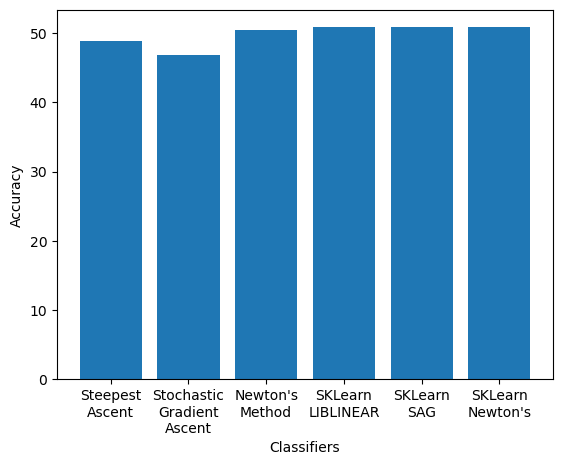

In [81]:
import matplotlib.pyplot as plt
methods_list = ["Steepest\nAscent", "Stochastic\nGradient\nAscent", "Newton's\nMethod", "SKLearn\nLIBLINEAR", "SKLearn\nSAG", "SKLearn\nNewton's"]
# plt.xticks([])
plt.bar(methods_list, accuracies)
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
plt.show()

# https://www.geeksforgeeks.org/how-to-display-the-value-of-each-bar-in-a-bar-chart-using-matplotlib/


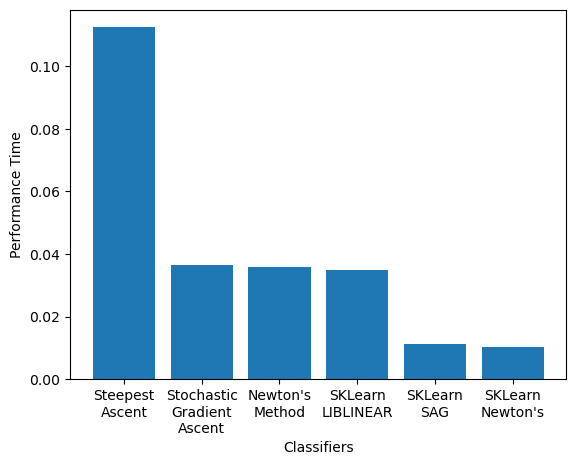

In [82]:
plt.bar(methods_list, times)
plt.xlabel("Classifiers")
plt.ylabel("Performance Time")
plt.show()